In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
totalrecord = pd.read_csv('total_business.csv')

In [3]:
montly_count = totalrecord[['placekey','month_num','visitor_cal']]
montly_count = montly_count[montly_count['month_num']<=29]
montly_count['month_num'].unique()

In [6]:
#1-14, 15-29
before = montly_count[montly_count['month_num']<=14]
after = montly_count[montly_count['month_num']>14]
aa = before.groupby(['placekey']).agg({'visitor_cal':'mean'})
bb = after.groupby(['placekey']).agg({'visitor_cal':'mean'})

aa['visitor_cal_after'] = bb['visitor_cal']
aa['change_%'] = (aa['visitor_cal_after']-aa['visitor_cal'])/aa['visitor_cal']*100
aa['change_num'] = aa['visitor_cal_after']-aa['visitor_cal']
aa.sort_values('change_%',ascending=True)

,visitor_cal,visitor_cal_after,change_%,change_num
placekey,,,,
229-222@627-s8v-z4v,94.142857,0.0,-100.0,-94.142857
235-222@627-wc7-tsq,4.357143,0.0,-100.0,-4.357143
235-222@627-s8j-3kf,77.357143,0.0,-100.0,-77.357143
235-222@627-s8h-vs5,0.928571,0.0,-100.0,-0.928571
234-223@627-s8j-3kf,64.071429,0.0,-100.0,-64.071429
...,...,...,...,...
zzy-223@627-s9c-d5f,0.000000,0.0,NaN,0.000000
zzy-223@627-wc7-qfz,0.000000,0.0,NaN,0.000000
zzy-224@627-s8h-v2k,0.000000,0.0,NaN,0.000000


In [7]:
aa.to_csv('1020test.csv')

In [73]:
cc = aa.dropna()
cc = cc[cc['change_%']<=1]
cc = cc[cc['change_num']<=0]
len(cc)
#cc.sort_values('change_%',ascending=True)
#cc['change_%'].hist(bins=30)

1969

<AxesSubplot:>

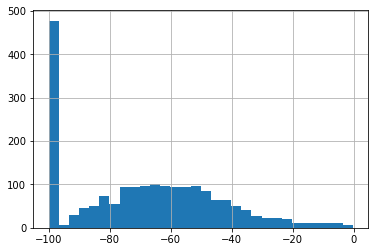

In [74]:
cc['change_%'].hist(bins=30)

<AxesSubplot:>

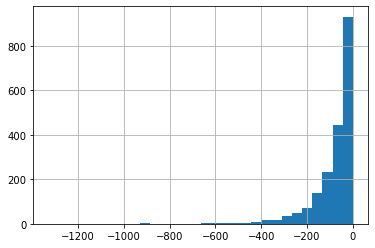

In [75]:
cc['change_num'].hist(bins=30)